### Analysis of Active Inventory and Product Sales Prediction

#### Team Members: 

##### a) Mansi Mhaisalkar
##### b) Ninad Umredkar
##### c) Rishi Kumar Raghukumar

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import *
import itertools
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('inventory_analysis.csv')
df.head(100)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0.0,0.0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0.0,0.0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0.0,0.0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0.0,0.0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0.0,0.0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


##### Data Pre-processing

In [3]:
df.shape

(198917, 14)

In [4]:
df.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [5]:
df.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


#### Few Inferences from above descritive Statistics of our data

###### 1) In SoldFlag and SoldCount column we have 75996 values. That means we have 198917 - 75996 = 122921 missing values. Which means we have 122921 products that haven't been marked sold yet.

###### 2) As catagorical variables are included in description therefore we can see NaNs at statistics where catagories or numeric values don't fit

###### 3) We can see total number of catogories in each column from unique value attribute. For Example, for FileType we have 2 catogories i.e, Active and Historical. Which also means we have more unsold products in our data as compared to sold products.

###### 4) From Top value attribute we can see which catogory occurs more often in our particular column. For Example, for FileType we have Active as top catagory which means active has higher frequence in data as compared to Historical.

###### We can see values of quartiles and see in which columns data is concentrated more at the center when we take median as our measure of center.

###### We can also see if there is skewness in data column by comapring mean and median. For Example, In StrengthFactor column mean = 1.117115e+06 and median = 5.822240e+05. As there is big difference in these values we can say that there in skewness in data of StrengthFactor column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
Order               198917 non-null int64
File_Type           198917 non-null object
SKU_number          198917 non-null int64
SoldFlag            75996 non-null float64
SoldCount           75996 non-null float64
MarketingType       198917 non-null object
ReleaseNumber       198917 non-null int64
New_Release_Flag    198917 non-null int64
StrengthFactor      198917 non-null float64
PriceReg            198917 non-null float64
ReleaseYear         198917 non-null int64
ItemCount           198917 non-null int64
LowUserPrice        198917 non-null float64
LowNetPrice         198917 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [7]:
cols = df.columns
num_cols = df._get_numeric_data().columns

In [8]:
num_cols

Index(['Order', 'SKU_number', 'SoldFlag', 'SoldCount', 'ReleaseNumber',
       'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ReleaseYear',
       'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [9]:
list(set(cols) - set(num_cols))

['File_Type', 'MarketingType']

#### But there are some variable which are categorical and not numerical based on the visibility of the values of the feature

###### SKU_number: This is the unique identifier for each product.

###### Order: Just a sequential counter.

###### SoldFlag: 1 = sold in past 6 mos. 0 = Not sold

###### MarketingType = Two categories of how we market the product. 

###### NewReleaseFlag = Any product that has had a future release (i.e., Release Number > 1)

In [10]:
# Checking for null values 

df.isna().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [11]:
df['SoldFlag'].value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

In [12]:
# Basic questions about the dataset

# 1. Number of enteries 
print(df.shape)
# We have 198917 rows and 14 columns 

# 2. Total number of products & unique values of the columns 
print("*****************")
print(df.nunique())

# 3. Count of the historical and active state 
print("*****************")
print(df[df['File_Type'] == 'Historical']['SKU_number'].count())
print(df[df['File_Type'] == 'Active']['SKU_number'].count())

# 3.1 Split the dataset into two parts based on the file_type 
sales_data_hist = df[df['File_Type'] == 'Historical']
sales_data_act = df[df['File_Type'] == 'Active']


(198917, 14)
*****************
Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64
*****************
75996
122921


##### Exploratory Data Analysis

In [13]:
# Corroleation Matrix

df.corr()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
Order,1.000000,0.042315,-0.173916,-0.120138,-0.051046,-0.047702,-0.148539,-0.050550,0.037010,0.025081,-0.292686,-0.022892
SKU_number,0.042315,1.000000,-0.108202,-0.072361,-0.210245,-0.296522,0.178424,-0.144848,-0.117989,-0.259904,-0.058901,0.035728
SoldFlag,-0.173916,-0.108202,1.000000,0.607248,0.075940,0.006877,-0.144816,0.084213,0.071994,0.236860,0.058525,-0.013734
SoldCount,-0.120138,-0.072361,0.607248,1.000000,0.055435,-0.005201,-0.109237,0.056702,0.070090,0.224002,0.042608,-0.011965
ReleaseNumber,-0.051046,-0.210245,0.075940,0.055435,1.000000,0.561506,-0.066511,0.167343,0.115710,0.164814,0.086223,0.017594
New_Release_Flag,-0.047702,-0.296522,0.006877,-0.005201,0.561506,1.000000,-0.023783,0.161047,0.068657,0.147317,0.084557,0.016698
StrengthFactor,-0.148539,0.178424,-0.144816,-0.109237,-0.066511,-0.023783,1.000000,0.033239,-0.275417,-0.249535,0.022484,0.055824
PriceReg,-0.050550,-0.144848,0.084213,0.056702,0.167343,0.161047,0.033239,1.000000,-0.010082,0.067112,0.135210,0.117767
ReleaseYear,0.037010,-0.117989,0.071994,0.070090,0.115710,0.068657,-0.275417,-0.010082,1.000000,0.033456,0.022759,-0.018850
ItemCount,0.025081,-0.259904,0.236860,0.224002,0.164814,0.147317,-0.249535,0.067112,0.033456,1.000000,0.002236,-0.071282


##### Note: Positively correlated variables will have correlation value close to +1 and negatively correlated variables will have correlation value close to -1.

(12.5, -0.5)

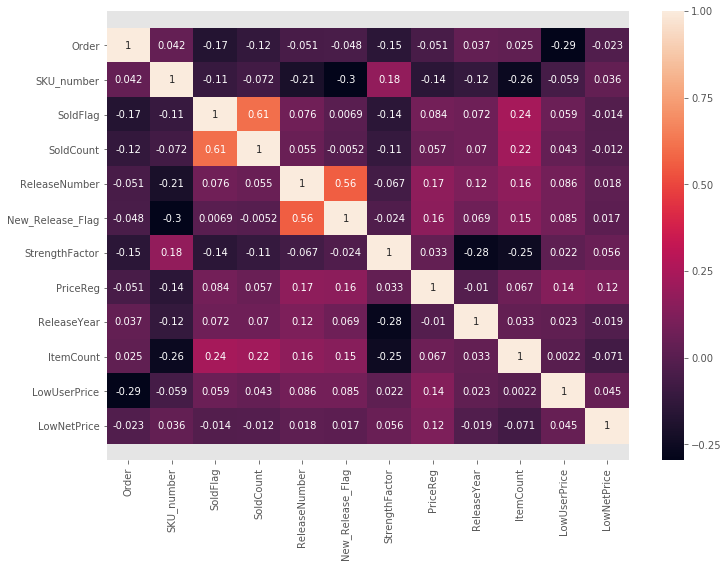

In [14]:
# Corroleation HeatMap

fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

###### Note: We can observe that all the columns have correlation concentrated around 0. Thus none of the columns are highly correlated with eachother although some have more or less correlation compared to others.

Numerical variable EDA, Plots with a kernel density estimate and histogram with bin size determined automatically

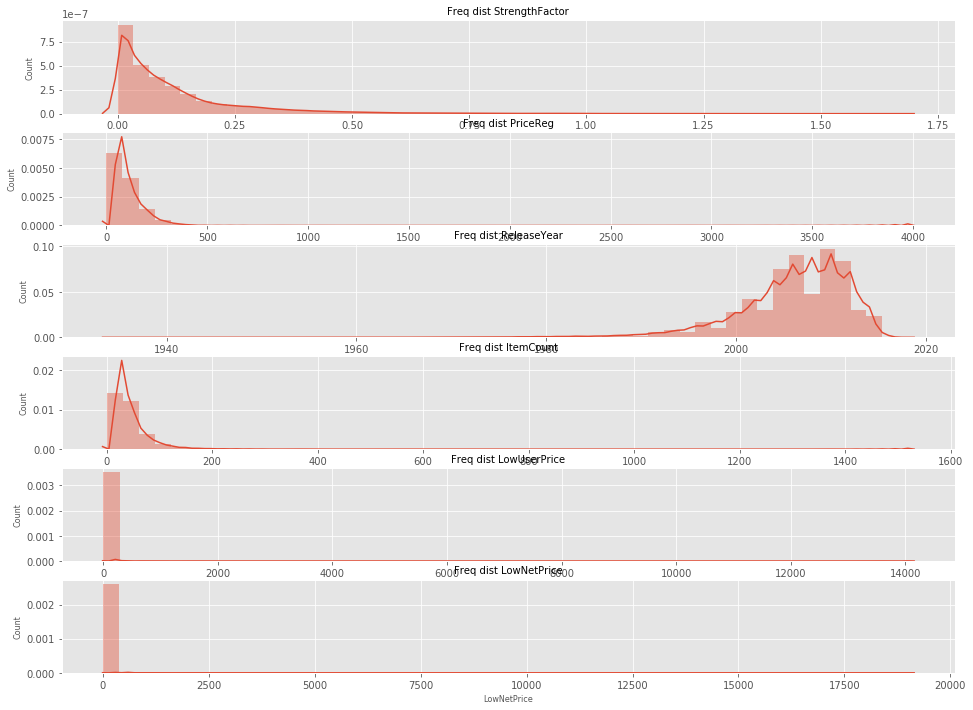

In [15]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
        
    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

###### Note: We can observe that these columns aren't normally distributed and have skewness in data

##### Univariate outlier detection

We can see graphical display of quartiles we saw in description above with describe(). This will make clear the outliers in our data and also the variability in our IQR.

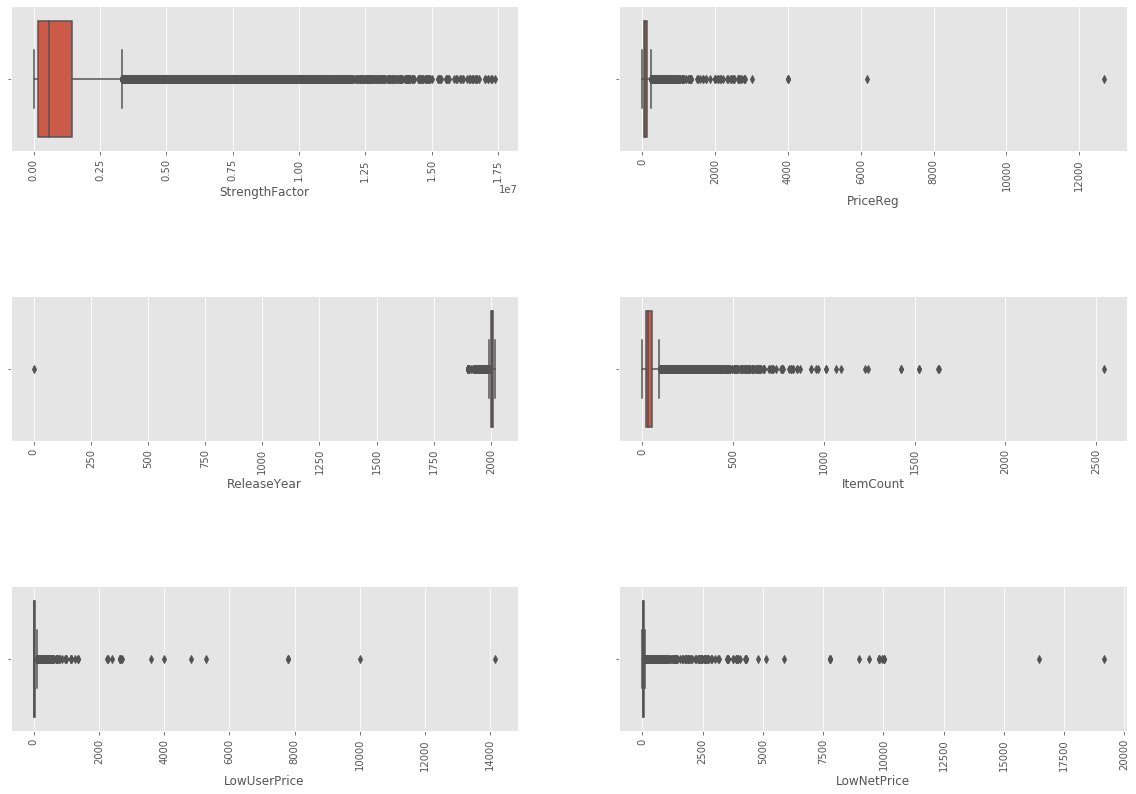

In [16]:
features=['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']
fig=plt.subplots(figsize=(20,40))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(x=j,data = df)
    plt.xticks(rotation=90)
    #plt.title("Sale & Inventory")
    
plt.show()

##### Note: We can observe that many columns have alot of outliers and some have very low variability

### ABC analysis

#### ABC analysis is an approach for classifying inventory items based on the items’ consumption values. 

#### Consumption value is the total value of an item consumed over a specified time period, for example a year. We are going to analyse the given data set by using ABC analysis in order to provide advise on product categories which will impact more on company revenues. I.e, some of items may not have sold out from the stores and it is loss of money.

#### Therefore we have to look up on the items which is fastly moving from the stores.

In [17]:
def ABC_segmentation(perc):
    if perc >0 and perc <0.6:
        return 'A'
    elif perc> 0.6 and perc<0.85:
        return 'B'
    elif perc>0.85:
        return 'C'
     

In [18]:
data_sub = df[['SKU_number','PriceReg','ItemCount','File_Type']][(df['File_Type'] == 'Historical')]
# create the column of the additive cost per SKU
data_sub['AddCost'] = data_sub['PriceReg'] * data_sub['ItemCount']
# order by cumulative cost
data_sub = data_sub.sort_values(by=['AddCost'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()
# create the column of the total sum
data_sub['TotSum'] = data_sub['AddCost'].sum()
# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']
# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

In [19]:
print(data_sub)

       SKU_number  PriceReg  ItemCount   File_Type    AddCost    RunCumCost  \
685        145889    244.60        851  Historical  208154.60  2.081546e+05   
601        435034    281.80        616  Historical  173588.80  3.817434e+05   
75056      538479   2645.30         49  Historical  129619.70  5.113631e+05   
5752       212633    235.60        521  Historical  122747.60  6.341107e+05   
3758       212480    208.80        579  Historical  120895.20  7.550059e+05   
5538       146453    279.00        374  Historical  104346.00  8.593519e+05   
33297       53667    194.00        536  Historical  103984.00  9.633359e+05   
4734       146385    279.00        370  Historical  103230.00  1.066566e+06   
11448      110448    421.50        244  Historical  102846.00  1.169412e+06   
5727       416609    346.25        296  Historical  102490.00  1.271902e+06   
21063      111899    369.50        272  Historical  100504.00  1.372406e+06   
24188       52146    369.50        264  Historical  

##### Note:
#### Category A items generally represent approximately 15%-20% of an overall inventory by item, but represent 80% of value of an inventory. Items in this category are goods which annual consumption value is the highest.

#### Category B items represent 30%-35% of inventory items by item type, and about 15% of the value. The items in this category are goods with medium consumption value.

#### Category C items represent 50% of actual items but only 5% of the inventory value. The items in this category are goods with the lowest consumption value.

In [20]:
print ('Cost of Class A :', data_sub[data_sub.Class == 'A']['AddCost'].sum())
print ('Cost of Class B :', data_sub[data_sub.Class == 'B']['AddCost'].sum())
print ('Cost of Class C :', data_sub[data_sub.Class == 'C']['AddCost'].sum())

Cost of Class A : 205577451.4
Cost of Class B : 85658215.25999999
Cost of Class C : 51396361.129999995


### Predictive Modelling

In [21]:
# Factorizing the data set to run as target variable and attribute

df['File_Type'] = df.File_Type.factorize()[0]
df['MarketingType'] = df.MarketingType.factorize()[0]

In [22]:
# Performing Train and Test Split 

train=df[df.SoldFlag.notnull()]
x=train.drop(["SoldFlag"],axis=1)
y=train.SoldFlag
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
x_train.head()

,Order,File_Type,SKU_number,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
22530,23039,0,105680,1.0,0,10,1,783133.0,89.95,2002,30,50.80,76.95
63902,71285,0,1470942,0.0,1,2,1,391468.0,95.00,2014,15,0.00,32.99
33237,33979,0,481244,0.0,0,4,1,1134536.0,106.00,2003,44,75.00,45.77
19334,19782,0,3465073,0.0,0,2,1,2157176.0,60.00,1991,14,0.00,58.51
73705,82507,0,569104,0.0,1,3,1,131805.0,44.99,2007,53,30.79,36.99


### Logistics Regression 

_________________Logistic Regression Test Data_________________
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18860
         1.0       0.00      0.00      0.00      3939

    accuracy                           0.83     22799
   macro avg       0.41      0.50      0.45     22799
weighted avg       0.68      0.83      0.75     22799

Accuracy: 82.72 %


C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


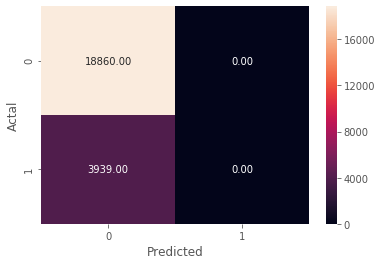

In [24]:
# Logistics Regression for Test Data

lr=LogisticRegression()

y_pred_logreg=lr.fit(x_train,y_train).predict(x_test)

print("_________________Logistic Regression Test Data_________________")
print (classification_report(y_test, y_pred_logreg))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_logreg) * 100))

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

_________________Logistic Regression for Train Data_________________
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     44140
         1.0       0.00      0.00      0.00      9057

    accuracy                           0.83     53197
   macro avg       0.41      0.50      0.45     53197
weighted avg       0.69      0.83      0.75     53197

Accuracy: 82.97 %


C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


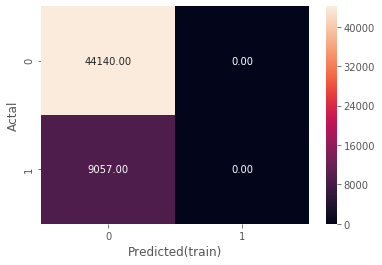

In [25]:
# Logistics Regression for Train Data

lr1=LogisticRegression()

y1_pred_logreg=lr.fit(x_train,y_train).predict(x_train)

print("_________________Logistic Regression for Train Data_________________")
print (classification_report(y_train, y1_pred_logreg))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_train, y1_pred_logreg) * 100))

sns.heatmap(confusion_matrix(y_train, y1_pred_logreg), annot=True, fmt='.2f')
plt.xlabel("Predicted(train)")
plt.ylabel("Actal")
plt.show()

### Support Vector Machine

_________________SVM for Test Data_________________
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18860
         1.0       0.00      0.00      0.00      3939

    accuracy                           0.83     22799
   macro avg       0.41      0.50      0.45     22799
weighted avg       0.68      0.83      0.75     22799

Accuracy: 82.72 %


C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


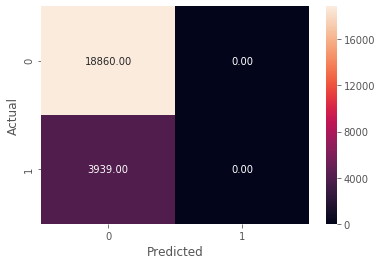

In [42]:
# Support Vector Machine for Test Data

svclassifier = svm.SVC()
svclassifier.fit(x_train, y_train)
y_pred_svm=svclassifier.predict(x_test)
print("_________________SVM for Test Data_________________")
print (classification_report(y_test, y_pred_svm))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_svm) * 100))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

_________________SVM for Train Data_________________
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     44140
         1.0       0.00      0.00      0.00      9057

    accuracy                           0.83     53197
   macro avg       0.41      0.50      0.45     53197
weighted avg       0.69      0.83      0.75     53197

Accuracy: 82.97 %


C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


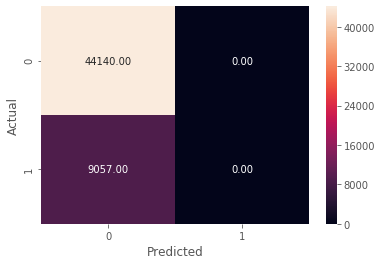

Confusion Matrix: 
 [[44140     0]
 [ 9057     0]]


In [43]:
# Support Vector Machine for Train Data

svclassifier1 = svm.SVC()
trainsvm=df[df.SoldFlag.notnull()]
xsvm=trainsvm.drop(['SoldFlag'],axis=1)
ysvm=trainsvm['SoldFlag']
xsvm_train,xsvm_test,ysvm_train,ysvm_test=train_test_split(xsvm,ysvm,test_size=0.3,random_state=2)
svclassifier1.fit(xsvm_train, ysvm_train)
y_pred_svm1=svclassifier.predict(xsvm_train)
print("_________________SVM for Train Data_________________")
print (classification_report(ysvm_train, y_pred_svm1))
print ("Accuracy: {:.2f} %".format(accuracy_score(ysvm_train, y_pred_svm1) * 100))

sns.heatmap(confusion_matrix(ysvm_train, y_pred_svm1), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('Confusion Matrix: \n', confusion_matrix(ysvm_train,y_pred_svm1))

### K-Nearest Neighbour

In [112]:
train=df[df.SoldFlag.notnull()]
X=train.drop(['SoldFlag'],axis=1)
Y=train['SoldFlag']

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

#### Note: We make a plot to see which neighbour will show optimal accuracy values 

In [115]:
approach=[]
for i in np.arange(1,51):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train.ravel())
    y_pred=KNN.predict(X_test)
    approach.append(accuracy_score(y_test, y_pred))

In [154]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Text(0, 0.5, 'Error')

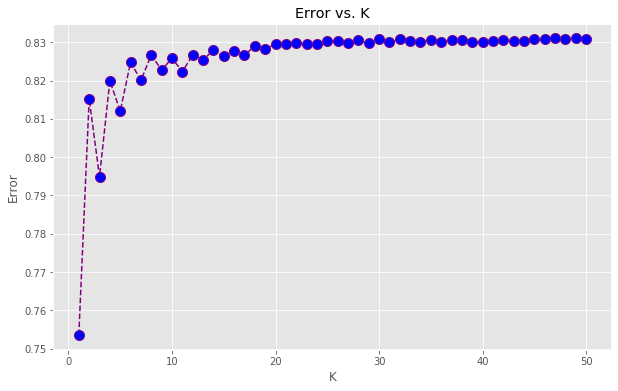

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),approach,color='purple', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')

#### Note: Apart from the plot we also make a table to get the values of neighbour's with respective accuracy score (used to find optimal Neighbour)

In [117]:
opti=pd.DataFrame({'N':np.arange(1,51),'Score':approach})
opti

,N,Score
0,1,0.753542
1,2,0.815211
2,3,0.794903
3,4,0.819948
4,5,0.812009
5,6,0.824773
6,7,0.820080
7,8,0.826659
8,9,0.822755
9,10,0.825826


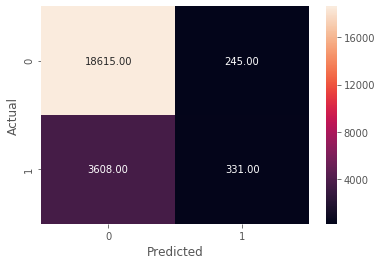

Confusion Matrix: 
 [[18615   245]
 [ 3608   331]]


In [118]:
# KNN for Test Data
# Neighbors need to be changed here.

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
knn=KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train,Y_train)
pred_i=knn.predict(X_test)

sns.heatmap(confusion_matrix(Y_test,pred_i), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('Confusion Matrix: \n', confusion_matrix(Y_test,pred_i))

In [120]:
print("_________________KNN for Test Data_________________")
print (classification_report(Y_test, pred_i))
print("Accuracy:", accuracy_score(Y_test, pred_i))

_________________KNN for Test Data_________________
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.57      0.08      0.15      3939

    accuracy                           0.83     22799
   macro avg       0.71      0.54      0.53     22799
weighted avg       0.79      0.83      0.77     22799

Accuracy: 0.8310013597087591


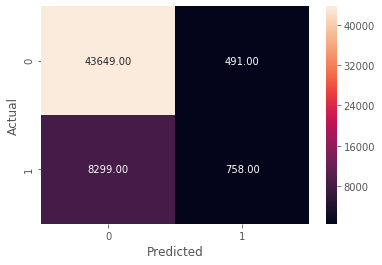

Confusion Matrix: 
 [[43649   491]
 [ 8299   758]]


In [121]:
# KNN for Train Data

X2=train.drop(['SoldFlag'],axis=1)
Y2=train['SoldFlag']
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.3,random_state=2)
knn1=KNeighborsClassifier(n_neighbors=47)
knn1.fit(X2_train,Y2_train)
pred1_i=knn.predict(X2_train)

sns.heatmap(confusion_matrix(Y2_train,pred1_i), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('Confusion Matrix: \n', confusion_matrix(Y2_train,pred1_i))

In [41]:
print("_________________KNN for Train Data_________________")
print (classification_report(Y2_train,pred1_i))
print("Accuracy:", accuracy_score(Y2_train,pred1_i))

_________________KNN for Train Data_________________
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     44140
         1.0       0.61      0.08      0.15      9057

    accuracy                           0.83     53197
   macro avg       0.72      0.54      0.53     53197
weighted avg       0.80      0.83      0.78     53197

Accuracy: 0.8347651183337407


### Random Forest

#### Random forest can be removed but is used to find the important features

In [44]:
train3=df[df.SoldFlag.notnull()]
X3=train3.drop(['SoldFlag'],axis=1)
Y3=train['SoldFlag']
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=0.3,random_state=2)
#n_estimators need to be confirmed once
clf_rf = RandomForestClassifier(n_estimators=25, random_state=2)
forest_est=clf_rf.fit(X3_train, Y3_train)

In [46]:
pred3 = clf_rf.predict(X3_test)

In [47]:
cnf_matrix = confusion_matrix(Y3_test, pred3)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[18860     0]
 [    0  3939]]


In [48]:
print("Accuracy:", accuracy_score(Y3_test, pred3))

Accuracy: 1.0


#### Note: Accuracy for random forest is too good to be true when its 100% without the removal of non important features, so we check the rating of features and remove the least important features in the successive step. 


In [49]:
# Importance of Features (Rating)

feature_importances = pd.Series(data=forest_est.feature_importances_, index=list(df.columns[0:-1]))
feature_importances = feature_importances.sort_values(axis=0, ascending=False)
feature_importances

SoldFlag            0.935217
Order               0.018152
ReleaseYear         0.013316
New_Release_Flag    0.008586
SoldCount           0.007407
ItemCount           0.004546
SKU_number          0.003822
PriceReg            0.002514
LowUserPrice        0.002469
StrengthFactor      0.002287
MarketingType       0.001473
ReleaseNumber       0.000212
File_Type           0.000000
dtype: float64

In [142]:
# Random Forest for Test Data After considering only the important feature

train4=df[df.SoldFlag.notnull()]
X4=train4.drop(["SoldFlag","Order","File_Type","SKU_number","SoldCount"],axis=1)
Y4=train4['SoldFlag']
X4_train,X4_test,Y4_train,Y4_test=train_test_split(X4,Y4,test_size=0.3,random_state=2)
#n_estimators need to be confirmed once
clf_rf = RandomForestClassifier(n_estimators=25, random_state=2)
forest_est=clf_rf.fit(X4_train, Y4_train)

In [143]:
pred4 = forest_est.predict(X4_test)

[[18169   691]
 [ 3215   724]]


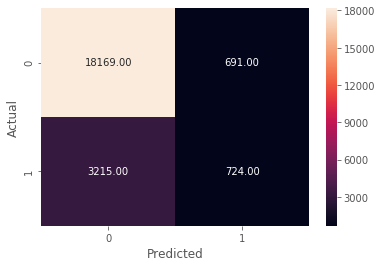

In [155]:
cnf_matrix = confusion_matrix(Y4_test, pred4)
np.set_printoptions(precision=2)
print(cnf_matrix)

sns.heatmap(confusion_matrix(Y4_test, pred4), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [145]:
print("Accuracy:", accuracy_score(Y4_test, pred4))

Accuracy: 0.828676696346331


In [146]:
print (classification_report(Y4_test, pred4))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     18860
         1.0       0.51      0.18      0.27      3939

    accuracy                           0.83     22799
   macro avg       0.68      0.57      0.59     22799
weighted avg       0.79      0.83      0.79     22799



In [74]:
# # Random Forest for Train Data After considering only the important feature

clf_rf1 = RandomForestClassifier(n_estimators=25, random_state=2)
forest_est=clf_rf1.fit(X4_train, Y4_train)
pred45 = forest_est.predict(X4_train)

In [75]:
cnf_matrix = confusion_matrix(Y4_train, pred45)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[44139     1]
 [  150  8907]]


In [76]:
print("Accuracy:", accuracy_score(Y4_train, pred45))

Accuracy: 0.9971614940692144


In [77]:
print (classification_report(Y4_train, pred45))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     44140
         1.0       1.00      0.98      0.99      9057

    accuracy                           1.00     53197
   macro avg       1.00      0.99      0.99     53197
weighted avg       1.00      1.00      1.00     53197



### Decision Tree

In [79]:
# Decison Tree for Test data

train5=df[df.SoldFlag.notnull()]
X5=train5.drop(["SoldFlag","Order","File_Type","SKU_number","SoldCount"],axis=1)
y5=train5['SoldFlag']
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.3,random_state=2)
dec1 = tree.DecisionTreeClassifier(criterion = 'gini')
dec1.fit(X5_train,y5_train)
y2_pred_train = dec1.predict(X5_test)

In [80]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y5_test,y2_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y5_test, y2_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y5_test, y2_pred_train)))

Mean Absolute Error: 0.2476863020307908
Mean Squared Error: 0.2476863020307908
Root Mean Squared Error: 0.49768092391691165


[[15938  2922]
 [ 2725  1214]]


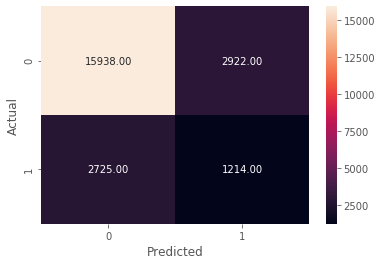

In [156]:
cnf_matrix = confusion_matrix(y5_test, y2_pred_train)
np.set_printoptions(precision=2)
print(cnf_matrix)

sns.heatmap(confusion_matrix(y5_test, y2_pred_train), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
print("Accuracy:", accuracy_score(y5_test, y2_pred_train))

Accuracy: 0.7523136979692092


In [83]:
print (classification_report(y5_test, y2_pred_train))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     18860
         1.0       0.29      0.31      0.30      3939

    accuracy                           0.75     22799
   macro avg       0.57      0.58      0.58     22799
weighted avg       0.76      0.75      0.75     22799



In [85]:
# Decison Tree for Train data

from sklearn import tree
train6=df[df.SoldFlag.notnull()]
X6=train6.drop(["SoldFlag","Order","File_Type","SKU_number","SoldCount"],axis=1)
y6=train6['SoldFlag']
X6_train,X6_test,y6_train,y6_test=train_test_split(X6,y6,test_size=0.3,random_state=2)
dec1 = tree.DecisionTreeClassifier(criterion = 'gini')
dec1.fit(X6_train,y6_train)
y3_pred_train = dec1.predict(X6_train)

In [87]:
cnf_matrix = confusion_matrix(y6_train,y3_pred_train)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[44140     0]
 [    0  9057]]


In [88]:
print (classification_report(y6_train,y3_pred_train))

print("Accuracy:", accuracy_score(y6_train,y3_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     44140
         1.0       1.00      1.00      1.00      9057

    accuracy                           1.00     53197
   macro avg       1.00      1.00      1.00     53197
weighted avg       1.00      1.00      1.00     53197

Accuracy: 1.0


### Consolidated result

In [90]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']

In [91]:
#logistic data
scores_lr = cross_validate(lr, x_train, y_train, scoring=scoring, cv=20)
lr_accuracy = scores_lr['test_accuracy'].mean()
lr_precision = scores_lr['test_precision_macro'].mean()
lr_recall = scores_lr['test_recall_macro'].mean()
lr_f1 = scores_lr['test_f1_weighted'].mean()

C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

In [127]:
#knn data
scores_knn = cross_validate(knn, X_train, Y_train, scoring=scoring, cv=20)

In [128]:
knn_accuracy = scores_knn['test_accuracy'].mean()
knn_precision = scores_knn['test_precision_macro'].mean()
knn_recall = scores_knn['test_recall_macro'].mean()
knn_f1 = scores_knn['test_f1_weighted'].mean()

In [129]:
knn_f1

0.7758697840319531

In [135]:
#svm data
scores_svm = cross_validate(svclassifier, x_train, y_train, scoring=scoring, cv=20)

C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

In [136]:
svc_accuracy = scores_knn['test_accuracy'].mean()
svc_precision = scores_knn['test_precision_macro'].mean()
svc_recall = scores_knn['test_recall_macro'].mean()
svc_f1 = scores_knn['test_f1_weighted'].mean()

In [137]:
svc_f1

0.7758697840319531

In [106]:
#decision tree
scores_dt = cross_validate(dec1, X5_train, y5_train, scoring=scoring, cv=20)

In [97]:
dt_accuracy = scores_dt['test_accuracy'].mean()
dt_precision = scores_dt['test_precision_macro'].mean()
dt_recall = scores_dt['test_recall_macro'].mean()
dt_f1 = scores_dt['test_f1_weighted'].mean()

In [147]:
#Random Forest
scores_rf = cross_validate(clf_rf, X4_train, Y4_train, scoring=scoring, cv=20)

In [148]:
rf_accuracy = scores_rf['test_accuracy'].mean()
rf_precision = scores_rf['test_precision_macro'].mean()
rf_recall = scores_rf['test_recall_macro'].mean()
rf_f1 = scores_rf['test_f1_weighted'].mean()

In [149]:
data_comparison_method = {
    'Model'       : ['Random Forest','Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression','SVM'],
    'Accuracy': [rf_accuracy,dt_accuracy,knn_accuracy,lr_accuracy,svc_accuracy],
    'Precision': [rf_precision,dt_precision,knn_precision,lr_precision,svc_precision],
    'Recall': [rf_recall,dt_recall,knn_recall,lr_recall,svc_recall],
    'F1_score': [rf_f1,dt_f1,knn_f1,lr_f1,svc_f1 ]}

In [150]:
print(data_comparison_method)

{'Model': ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression', 'SVM'], 'Accuracy': [0.8297647724991304, 0.7490462594055655, 0.8326784335792471, 0.8296708652978818, 0.8326784335792471], 'Precision': [0.676165189266555, 0.5671964135391729, 0.7031239247978539, 0.4251500850270086, 0.7031239247978539], 'Recall': [0.5730236218009854, 0.5712487804618762, 0.5322619227701374, 0.5003494300194744, 0.5322619227701374], 'F1_score': [0.795538253565474, 0.7526907934373208, 0.7758697840319531, 0.7528108586769842, 0.7758697840319531]}


In [151]:
models_tree = pd.DataFrame(data_comparison_method, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score',])


In [152]:
models_tree

,Model,Accuracy,Precision,Recall,F1_score
0,Random Forest,0.829765,0.676165,0.573024,0.795538
1,Decision Tree,0.749046,0.567196,0.571249,0.752691
2,K-Nearest Neighbors,0.832678,0.703124,0.532262,0.775870
3,Logistic Regression,0.829671,0.425150,0.500349,0.752811
4,SVM,0.832678,0.703124,0.532262,0.775870
